In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D,
    BatchNormalization,
    LeakyReLU,
    MaxPooling2D,
    Flatten,
    Dense,
    Dropout,
)
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense

import tensorflow as tf
import numpy as np
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from matplotlib import pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
X_train.shape, X_test.shape

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


((60000, 28, 28), (10000, 28, 28))

In [4]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:

# Define class names
train_class_names = [str(i) for i in range(10)]  # MNIST classes are digits 0-9

print("Shape of X_train:", X_train.shape)
print("Train class names:", train_class_names)

class_names = train_class_names


Shape of X_train: (60000, 28, 28, 1)
Train class names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [13]:
# Class labels in Fashion MNIST
class_labels = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

print("Class Labels in Fashion MNIST:")
for i, label in enumerate(class_labels):
    print(f"{i}: {label}")


Class Labels in Fashion MNIST:
0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot


In [29]:
# Build the model using functional API
i = Input(shape = X_train[0].shape)
x = Conv2D(32, (3, 3), strides = 2,activation="relu", padding = 'same')(i)
x = Conv2D(64, (3, 3), strides = 2,activation="relu", padding = 'same')(x)
x = Conv2D(128, (3, 3), strides = 2,activation="relu", padding = 'same')(x)

x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation = 'softmax')(x)

model = Model(i,x)


In [30]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 7, 7, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,146,890 (4.38 MB)

 Trainable params: 1,146,890 (4.38 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)



In [32]:
class_names = class_labels
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [33]:
history = model.fit(
    X_train, y_train,
    epochs = 10,
    validation_data = (X_test, y_test),
    batch_size = 128,
    verbose = 1,
)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 32ms/step - accuracy: 0.7522 - loss: 0.6885 - val_accuracy: 0.8643 - val_loss: 0.3667
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.8695 - loss: 0.3528 - val_accuracy: 0.8874 - val_loss: 0.2990
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.8861 - loss: 0.3033 - val_accuracy: 0.8951 - val_loss: 0.2823
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 34ms/step - accuracy: 0.8992 - loss: 0.2703 - val_accuracy: 0.9020 - val_loss: 0.2652
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9040 - loss: 0.2534 - val_accuracy: 0.9065 - val_loss: 0.2579
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 35ms/step - accuracy: 0.9130 - loss: 0.2355 - val_accuracy: 0.9096 - val_loss: 0.2513
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - accuracy: 0.9178 - loss: 0.2227 - val_accuracy: 0.9124 - val_loss: 0.2502
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9207 -

In [19]:
model.save("fashion_mnist.keras")


# Training and Evaluation


In [34]:
# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=1)

# Print the results
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9083 - loss: 0.2613
Test loss: 0.24771790206432343
Test accuracy: 0.9106000065803528


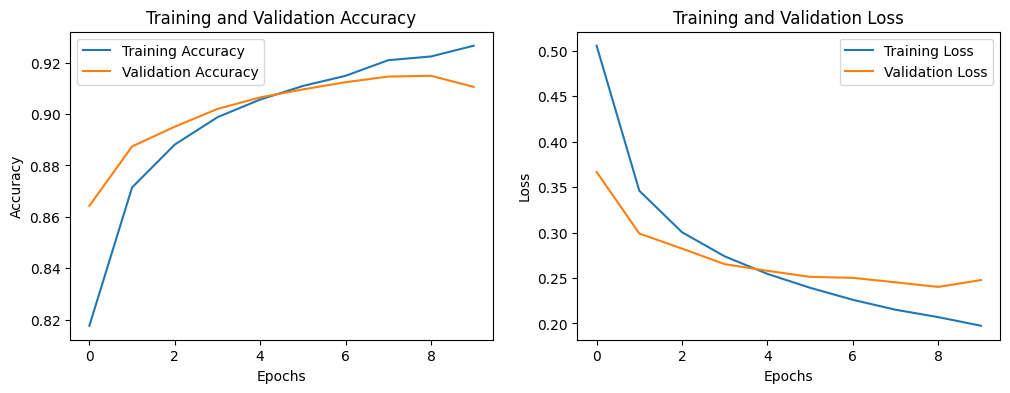

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import numpy as np

# Define class names (replace these with actual class names if available)
CLASS_NAMES = class_names

# Function to plot accuracy and loss curves
def plot_training_curves(history):
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.show()

# Call the function to plot curves
plot_training_curves(history)



313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.83      0.89      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.82      0.90      0.86      1000
       Dress       0.92      0.93      0.93      1000
        Coat       0.83      0.86      0.85      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.81      0.64      0.72      1000
     Sneaker       0.96      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

Precision: 0.91, Recall: 0.91, F1 Score: 0.91


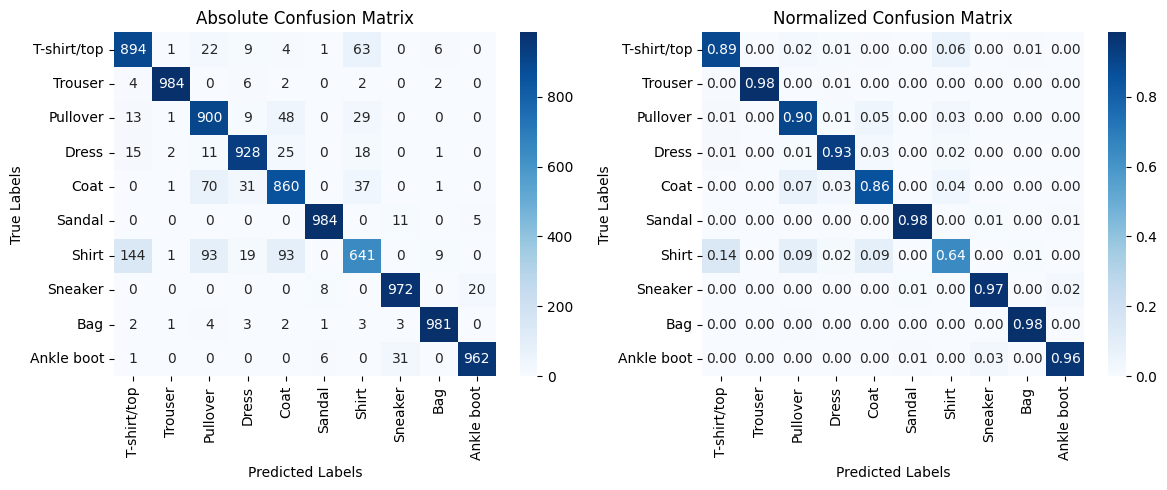

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Predict on test data
Y_pred = model.predict(X_test)  # Predictions for the test set
Y_pred_classes = np.argmax(Y_pred, axis=1)  # Convert predicted probabilities to class indices

# True labels
Y_true = y_test  # Ground truth labels from the test set

# Define class names (if not already defined)
class_names = class_labels

# Generate a classification report
print("Classification Report:\n", classification_report(Y_true, Y_pred_classes, target_names=class_names))

# Calculate precision, recall, and F1-score
precision = precision_score(Y_true, Y_pred_classes, average='weighted')
recall = recall_score(Y_true, Y_pred_classes, average='weighted')
f1 = f1_score(Y_true, Y_pred_classes, average='weighted')
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}')

# Calculate confusion matrices
abs_conf_matrix = confusion_matrix(Y_true, Y_pred_classes)  # Absolute confusion matrix
norm_conf_matrix = confusion_matrix(Y_true, Y_pred_classes, normalize='true')  # Normalized confusion matrix

# Plot absolute confusion matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(abs_conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.title("Absolute Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Plot normalized confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(norm_conf_matrix, annot=True, cmap='Blues', fmt='.2f', xticklabels=class_names, yticklabels=class_names)
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


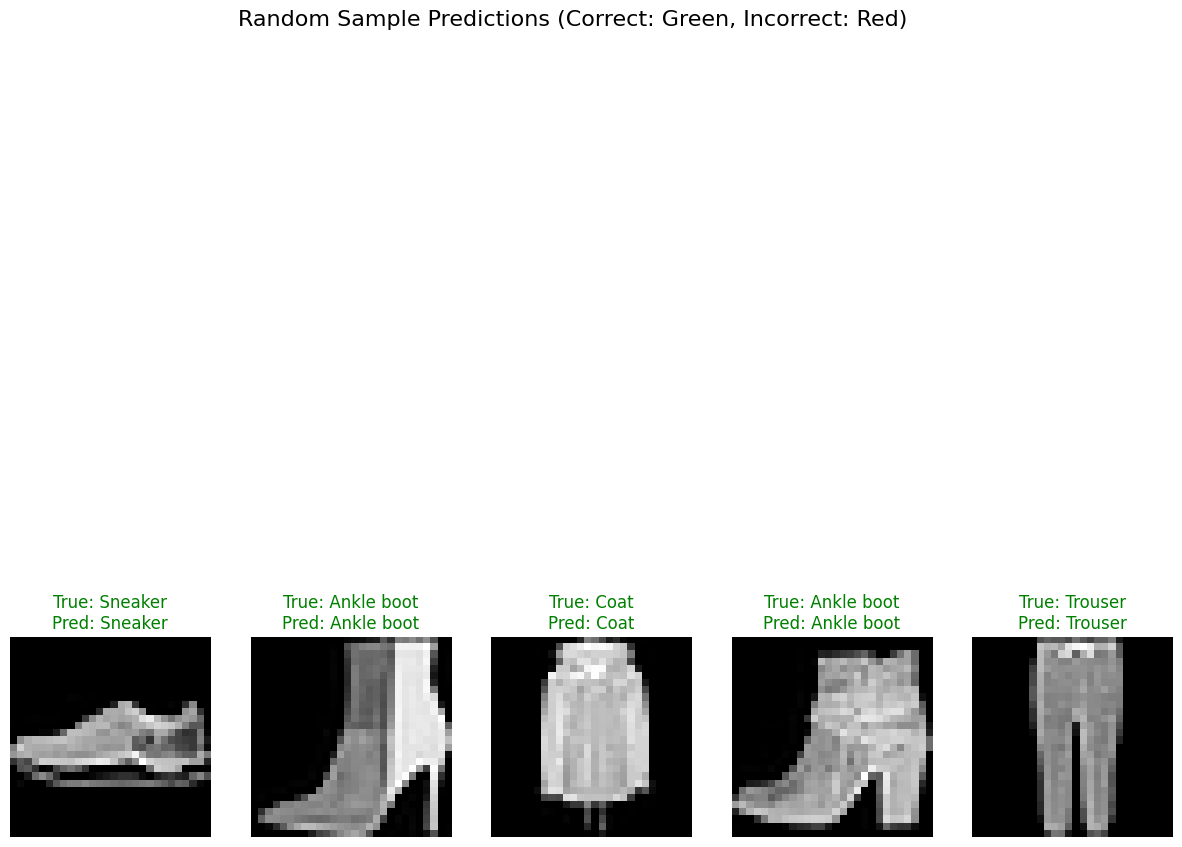

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Predict on test data
Y_pred = model.predict(X_test)  # Predictions for the test set
Y_pred_classes = np.argmax(Y_pred, axis=1)  # Convert predicted probabilities to class indices

# True labels
Y_true = y_test  # Ground truth labels from the test set

# Define class labels
class_labels = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

# Function to randomly sample images and check predictions
def plot_random_samples(X_data, Y_true, Y_pred_classes, class_labels, n=10):
    random_indices = np.random.choice(len(X_data), size=n, replace=False)  # Randomly select `n` indices
    plt.figure(figsize=(15, 15))
    for i, idx in enumerate(random_indices):
        plt.subplot(1, n, i + 1)
        plt.imshow(X_data[idx], cmap='gray')  # Assuming grayscale images
        true_label = class_labels[Y_true[idx]]  # Map integer to class name
        pred_label = class_labels[Y_pred_classes[idx]]  # Map integer to class name
        color = "green" if Y_true[idx] == Y_pred_classes[idx] else "red"
        plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
        plt.axis('off')
    plt.suptitle("Random Sample Predictions (Correct: Green, Incorrect: Red)", fontsize=16)
    plt.show()

# Choose `n` random samples and visualize
n = 10  # Number of random samples to display
plot_random_samples(X_test, Y_true, Y_pred_classes, class_labels, n=5)


In [40]:
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [41]:
class_labels


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']